In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

In [3]:
df.shape

(10000, 14)

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


C:\Users\dell\AppData\Local\Temp\ipykernel_7828\4181153605.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

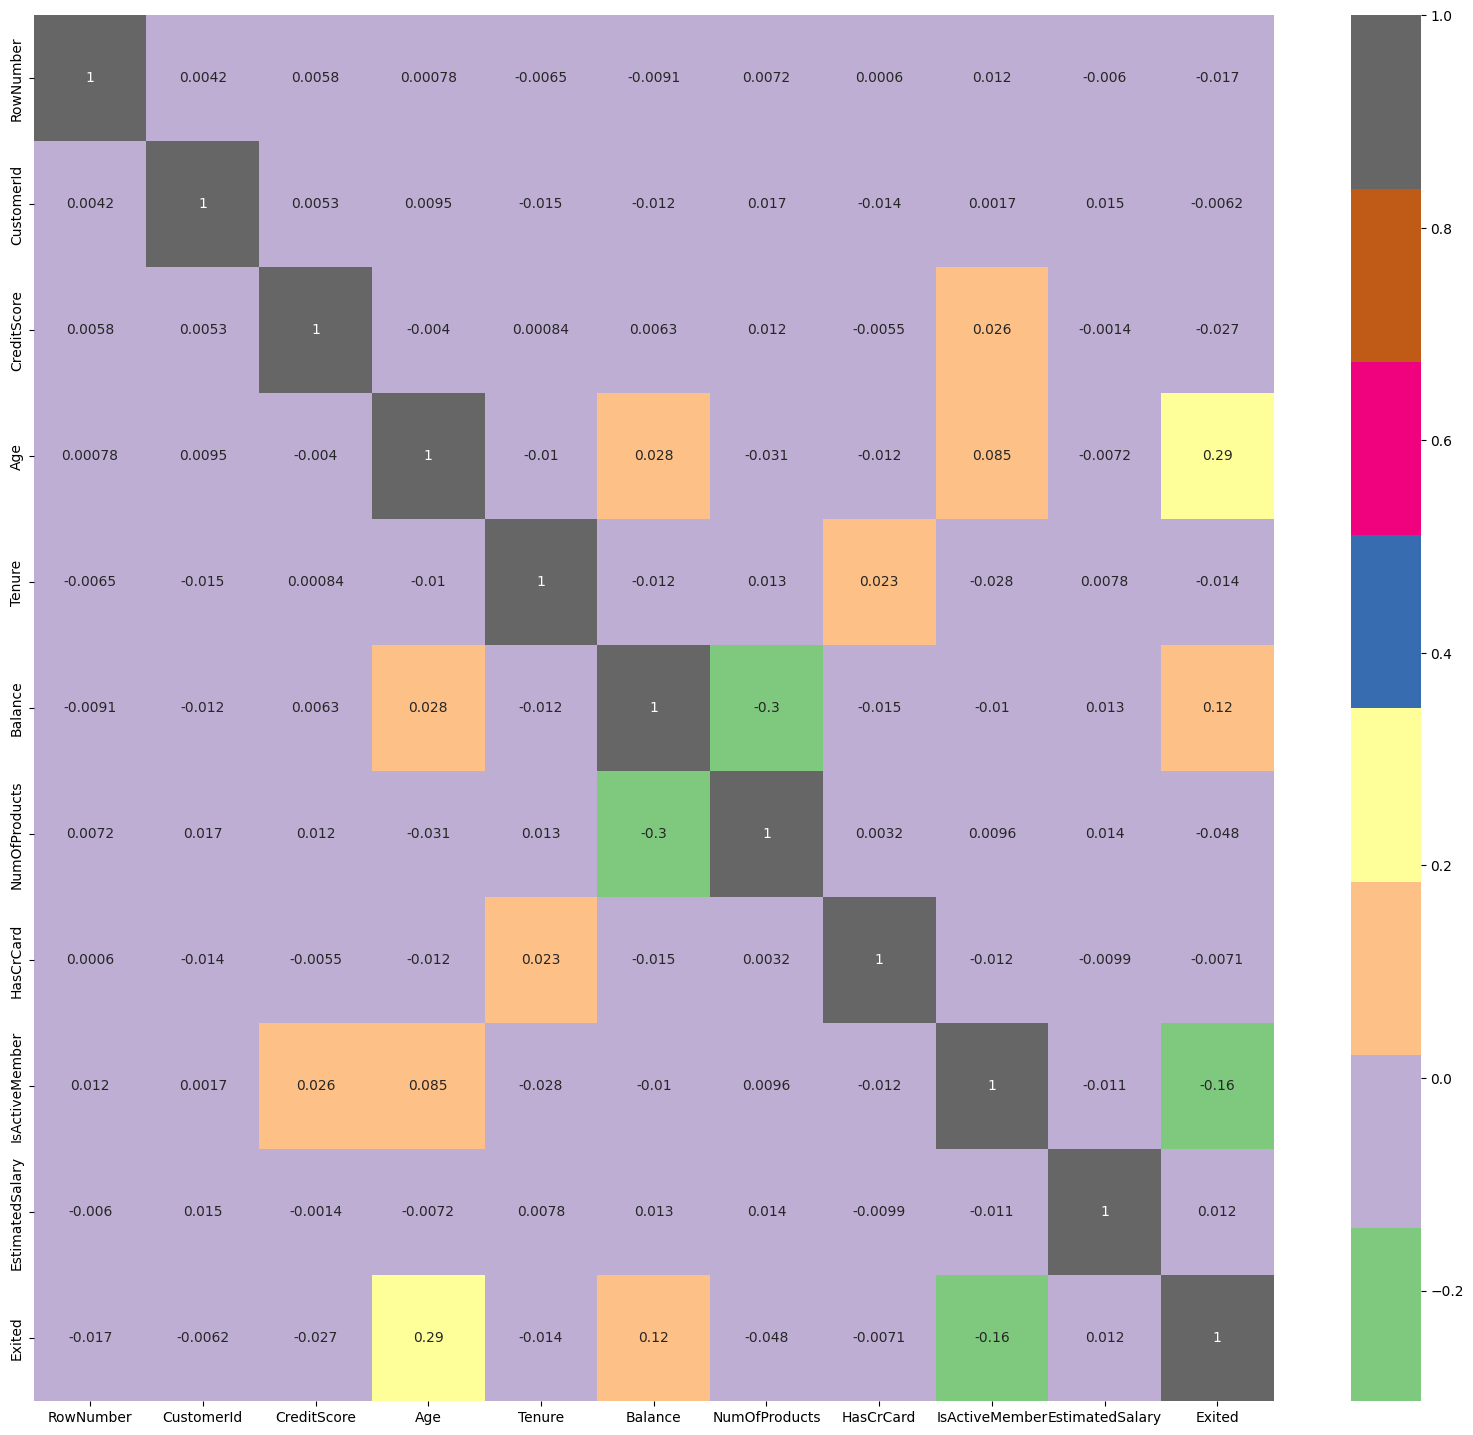

In [6]:
# Correlation Matrix?

plt.figure(figsize=(20,18))
corr = df.corr()
sns.heatmap(corr, annot = True, cmap="Accent")

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
df['Gender'] = np.where(df['Gender']=='Male', 1, 0)

In [9]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,0,28,4,130142.79,1,1,0,38190.78,0


In [10]:
df.drop(columns=['RowNumber', "CustomerId", "Surname","Geography"], inplace=True)

In [11]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [12]:
X = df.drop(columns = ['Exited']).values

In [13]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
X

array([[6.1900000e+02, 0.0000000e+00, 4.2000000e+01, ..., 1.0000000e+00,
        1.0000000e+00, 1.0134888e+05],
       [6.0800000e+02, 0.0000000e+00, 4.1000000e+01, ..., 0.0000000e+00,
        1.0000000e+00, 1.1254258e+05],
       [5.0200000e+02, 0.0000000e+00, 4.2000000e+01, ..., 1.0000000e+00,
        0.0000000e+00, 1.1393157e+05],
       ...,
       [7.0900000e+02, 0.0000000e+00, 3.6000000e+01, ..., 0.0000000e+00,
        1.0000000e+00, 4.2085580e+04],
       [7.7200000e+02, 1.0000000e+00, 4.2000000e+01, ..., 1.0000000e+00,
        0.0000000e+00, 9.2888520e+04],
       [7.9200000e+02, 0.0000000e+00, 2.8000000e+01, ..., 1.0000000e+00,
        0.0000000e+00, 3.8190780e+04]])

In [15]:
type(X)

numpy.ndarray

In [16]:
X.dtype

dtype('float64')

In [17]:
X[0,:]

array([6.1900000e+02, 0.0000000e+00, 4.2000000e+01, 2.0000000e+00,
       0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
       1.0134888e+05])

In [18]:
X.shape

(10000, 9)

In [19]:
y = df['Exited'].values

In [20]:
y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [21]:
type(y)

numpy.ndarray

In [22]:
y.dtype

dtype('int64')

In [23]:
y.shape

(10000,)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
# Modelling using Logistic Regression
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [27]:
lr.score(X_train,y_train)

0.7847761194029851

In [28]:
lr.score(X_test,y_test)

0.8015151515151515

In [29]:
# Predict on the test set
y_pred = lr.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, classification_report

In [31]:
# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[2592   65]
 [ 590   53]]


Which axis contains actual values and which axis contains predicted values?
The X-axis contains the predicted values(y_pred) and Y-axis includes the actual values (y_test).

How to find the order of labels in the confusion matrix?

In [32]:
lr.classes_

array([0, 1], dtype=int64)

In [33]:
# calculate accuracy and compare with the score function's result

In [34]:
true_negatives, false_positives, false_negatives, true_positives = conf_matrix.ravel()

In [35]:
print("TN=",true_negatives)
print("FP=",false_positives)
print("FN=",false_negatives)
print("TP=",true_positives)

TN= 2592
FP= 65
FN= 590
TP= 53


In [36]:
precision = true_positives / (true_positives + false_positives)
print("precision=",precision)

precision= 0.4491525423728814


In [37]:
recall = true_positives / (true_positives + false_negatives)
print("recall=",recall)

recall= 0.08242612752721618


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2657
           1       0.45      0.08      0.14       643

    accuracy                           0.80      3300
   macro avg       0.63      0.53      0.51      3300
weighted avg       0.74      0.80      0.74      3300



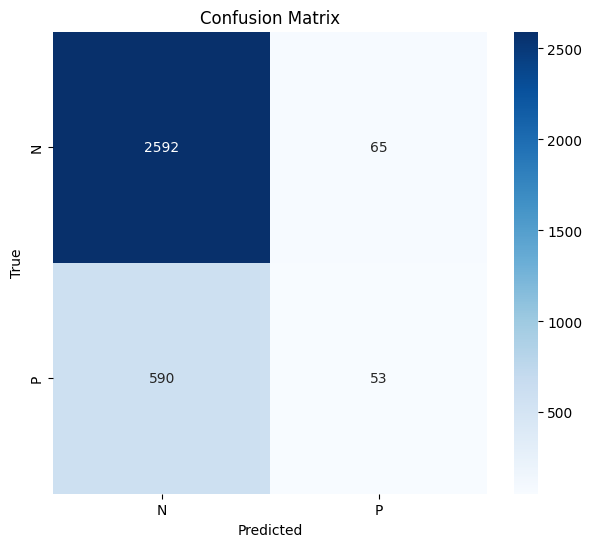

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
class_names = 'NP'
plt.figure(figsize=(7,6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()